<a href="https://colab.research.google.com/github/gabtns/Proyectos-de-Machine-Learning/blob/main/WebScraping(Clima).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Se importan las librerias para poder obtener los datos de la web, que en este caso es una pagina web del clima que tiene como objetivo la ciudad de rosario.
Las librerias principales son, requests y bs4.

*Realizado por Gabriel Alegre  27/07/2023*

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

En esta seccion se obtiene la ruta de la página web de donde se sacaran las temperaturas del lugar elegido, el cual es ROSARIO.

In [2]:
tiempo = 'https://www.meteored.com.ar/tiempo-en_Rosario-America+Sur-Argentina-Santa+Fe--1-13586.html'

A partir de la creación de la variable con la URL, se obtiene el texto del html. El cual debe ser procesado para su posterior analisis.

In [ ]:
temp = requests.get(tiempo)
soup_tiempo = BeautifulSoup(temp.text,"lxml")
soup_tiempo

Para realizar dicha acciñon primeramente se debe observar en las etiquetas donde estan contenidas los datos que deseamos obtener, con F12 se reliza la busqueda y una vez realidazo este paso se empieza a buscar los valores mediante el metodo FIND, el cual se le pasa como parametros la etiqueta, la clase y como se llama dicha clase.

In [ ]:
clima = soup_tiempo.find("span",attrs={"class" : "datos-dos-semanas"})
clima

Luego se empieza a filtrar hasta obtener los datos deseados.


In [5]:
dias = soup_tiempo.find_all("span",attrs ={"class": "cuando"})
dias

[<span class="cuando">Hoy<br/><span>27 Jul</span></span>,
 <span class="cuando">Mañana<br/><span>28 Jul</span></span>,
 <span class="cuando">Sábado<br/><span>29 Jul</span></span>,
 <span class="cuando">Domingo<br/><span>30 Jul</span></span>,
 <span class="cuando">Lunes<br/><span>31 Jul</span></span>,
 <span class="cuando">Martes<br/><span>1 Ago</span></span>,
 <span class="cuando">Miércoles<br/><span>2 Ago</span></span>]

In [6]:
# Mediante el bucle se tratan los datos para que puedan ser tratados. Al finalizar el proceso los datos de los dias quedan en una lista.
lenf = []
for i in dias:
  dias_efec = i.text
  dias = dias_efec[:-3]
  lenf.append(dias)
lenf

['Hoy27 ',
 'Mañana28 ',
 'Sábado29 ',
 'Domingo30 ',
 'Lunes31 ',
 'Martes1 ',
 'Miércoles2 ']

In [7]:
# Se reemplazan los valores para que tengan la misma forma los datos.
lista = []
for x in lenf:
  if x == 'Hoy22 ':
    x = "Domingo22"
  if x == 'Mañana23 ':
    x = "Lunes23"
  lista.append(x)
lista

['Hoy27 ',
 'Mañana28 ',
 'Sábado29 ',
 'Domingo30 ',
 'Lunes31 ',
 'Martes1 ',
 'Miércoles2 ']

En este paso se puede observar que ya tenemos los datops, el paso que faltaria seria limpiarlos para poder trabajar con ellos.

In [8]:
temperaturas = soup_tiempo.find_all("span",attrs={"class" : "temperatura"})
temperaturas

[<span class="temperatura changeUnitT" data="6|0|">6</span>,
 <span class="temperatura changeUnitT" data="8|0|">8</span>,
 <span class="temperatura changeUnitT" data="6|0|">6</span>,
 <span class="temperatura changeUnitT" data="0|0|">0</span>,
 <span class="temperatura"> <span class="icono"><svg class="simbW" version="1.1" xmlns="http://www.w3.org/2000/svg"><use class="useSW" data="sp3" xlink:href="#sW2n"></use></svg></span> <span class="dato-temperatura changeUnitT" data="5.07|0|">5°</span> <span class="sensacion changeUnitT" data="3.24|0|Sensación de ">Sensación de <strong>3°</strong></span> </span>,
 <span class="temperatura"> <span class="maxima changeUnitT" data="15.71|0|">16°</span> <span class="barra">/</span> <span class="minima changeUnitT" data="4.61|0|">5°</span> </span>,
 <span class="temperatura"> <span class="maxima changeUnitT" data="16.44|0|">16°</span> <span class="barra">/</span> <span class="minima changeUnitT" data="4.7|0|">5°</span> </span>,
 <span class="temperatu

Se guardan los datos y se procede a limpiar de forma que definitivamente se puedan utilizar para su posterior analisis.
Se obtienen los datos mediante una lista por comprension y luego se reemplazan caracteres indeseados. Estos valores tratados se guardan en una lista vacia realizada con anterioridad.

In [9]:
temperaturas_maximas = soup_tiempo.find_all("span",attrs={"class" : "maxima changeUnitT"})
temperaturas_max = [i.get("data") for i in temperaturas_maximas]
minimax = []
for i in temperaturas_max :
  d = i.replace("|","")
  x = d[:-1]
  minimax.append(x)
minimax

['15.71', '16.44', '18.13', '20.04', '22.8', '26.7', '20.22']

Se hacen los mismos pasos para las temperaturas minimas.


In [10]:
temperaturas_minimas = soup_tiempo.find_all("span",attrs={"class" : "minima changeUnitT"})
temp_minimas = [i.get("data") for i in temperaturas_minimas]
mintem = []
for i in temp_minimas:
  d = i.replace("|","")
  x = d[:-1]
  mintem.append(x)
mintem

['4.61', '4.7', '7.94', '9.83', '9.71', '16.57', '14.73']

# Se transforman los datos mediante la libreria pandas.

In [11]:
mintem = pd.to_numeric(mintem)
minimax = pd.to_numeric(minimax)


In [12]:
# Se crea el dataframe con los datos recibidos en los cuales se le da una longitud que este acorde a los dias que se quieran observar.
df = pd.DataFrame({"dias" : lista, "Temp. Max":minimax[:7]," Temp. Min ": mintem[:7] })
df.dtypes
lista

['Hoy27 ',
 'Mañana28 ',
 'Sábado29 ',
 'Domingo30 ',
 'Lunes31 ',
 'Martes1 ',
 'Miércoles2 ']

# Se crea la funcion para visualizar los datos, en los cuales se muestran los dias y las temperaturas de cada dia.


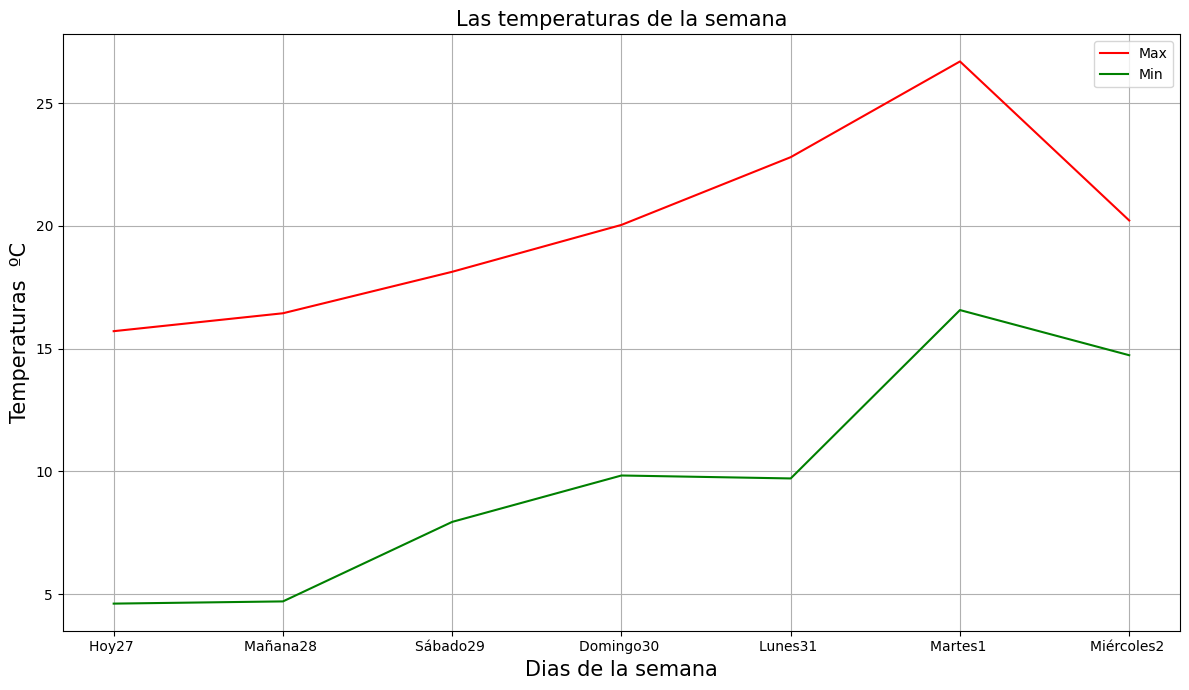

In [14]:
def mat(x,y,z):
  plt.figure(figsize = (12,7), tight_layout = True , )
  plt.plot(x,y,color='red',label = "Max")
  plt.plot(x,z,color='g',label = "Min")
  plt.title("Las temperaturas de la semana",fontsize=15)
  plt.xlabel("Dias de la semana",fontsize=15)
  plt.ylabel("Temperaturas  ºC",fontsize=15)
  plt.grid(True)
  plt.legend()
mat(lista,minimax[:7],mintem[:7])